In [10]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# SQL Authentication
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=vfm-sql-prod.verz.local\SNS, 1433;'
    'Database=vfm;'
    'UID=snsconnect;'
    'PWD=%Sungard765;')

# open connection
cursor = conn.cursor()
 
# execute SQL
cursor.execute('''
select * 
from [dbo].[snsv_rates_all_r]
where rate_dt = '24-nov-2020'
               ''') 
# put the results into an object
result = cursor.fetchall()

In [12]:
# get the columns for the result
cols = [column[0] for column in cursor.description]

In [14]:
# iterate over each row and append to list
data = []
for row in result:
    # convert a tuple to a list
    rowlist = list(row)
    data.append(rowlist)
        
 
# create a dataframe
df = pd.DataFrame(data, columns = cols)

# close connection
cursor.close()

In [15]:
# print the dataframe
print(df)

        rate_dt           rate_name  ccy   rate_type   seq_no  curve_type  \
0    2020-11-24  CDS Asia Banking A  USD  End of Day  4698195       Yield   
1    2020-11-24  CDS Asia Banking A  USD  End of Day  4698196       Yield   
2    2020-11-24  CDS Asia Banking A  USD  End of Day  4698197       Yield   
3    2020-11-24  CDS Asia Banking A  USD  End of Day  4698198       Yield   
4    2020-11-24  CDS Asia Banking A  USD  End of Day  4698199       Yield   
...         ...                 ...  ...         ...      ...         ...   
2637 2020-11-24        US912810FM54  USD  End of Day  1105973  Capital Pr   
2638 2020-11-24        US912810FJ26  USD  End of Day  1105974  Capital Pr   
2639 2020-11-24        US44986NAA37  USD  End of Day  1105975  Capital Pr   
2640 2020-11-24        XS0995102778  USD  End of Day  1105976  Capital Pr   
2641 2020-11-24        US912828QN35  USD  End of Day  1105977  Capital Pr   

       input_dt time_band  days_off  actual_dt  ...  start_term maturity_te

In [16]:
print(df[["curve_type","rate_name","ccy","bid","offer"]].groupby(["curve_type","rate_name","ccy"]).mean())

                                 bid    offer
curve_type rate_name    ccy                  
Capital Pr AT0000A001X2 EUR  103.288  103.288
           AT0000A0U3T4 EUR  108.247  108.247
           AT0000A105W3 EUR  107.250  107.250
           AT0000A185T1 EUR  109.363  109.363
           AT0000A1FAP5 EUR  109.412  109.412
...                              ...      ...
Yield      US912810FT08 USD    1.000    1.000
           US9128282R06 USD    1.000    1.000
           US912828YF19 USD    1.000    1.000
           US912828ZC78 USD    1.000    1.000
           US912828ZQ64 USD    1.000    1.000

[688 rows x 2 columns]


In [17]:
yield_curve = df[(df["curve_type"] == 'Yield') & (df["ccy"]=='EUR') & (df["rate_name"] == "Swap 3M BB")][['rate_name','actual_dt','time_band','mid']]
print(yield_curve)
yield_curve.describe()


       rate_name  actual_dt time_band    mid
1506  Swap 3M BB 2021-11-26    1 YEAR -0.541
1507  Swap 3M BB 2022-11-28   2 YEARS -0.547
1508  Swap 3M BB 2023-11-27   3 YEARS -0.540
1509  Swap 3M BB 2024-11-26   4 YEARS -0.518
1510  Swap 3M BB 2025-11-26   5 YEARS -0.487
1511  Swap 3M BB 2026-11-26   6 YEARS -0.450
1512  Swap 3M BB 2027-11-26   7 YEARS -0.409
1513  Swap 3M BB 2028-11-27   8 YEARS -0.364
1514  Swap 3M BB 2029-11-26   9 YEARS -0.317
1515  Swap 3M BB 2030-11-26  10 YEARS -0.267
1516  Swap 3M BB 2031-11-26  11 YEARS -0.218
1517  Swap 3M BB 2032-11-26  12 YEARS -0.171
1518  Swap 3M BB 2035-11-26  15 YEARS -0.058
1519  Swap 3M BB 2040-11-26  20 YEARS  0.033
1520  Swap 3M BB 2045-11-27  25 YEARS  0.041
1521  Swap 3M BB 2050-11-28  30 YEARS  0.019


,mid
count,16.000000
mean,-0.299625
std,0.217546
min,-0.547000
25%,-0.494750
50%,-0.340500
75%,-0.142750
max,0.041000


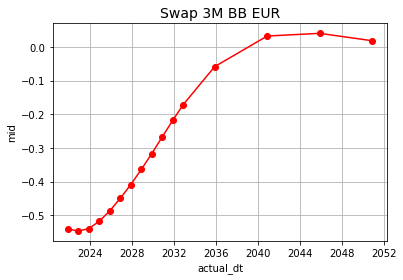

In [18]:
xAxis = yield_curve['actual_dt']
yAxis = yield_curve['mid']

plt.plot(xAxis, yAxis, color='red', marker='o')
plt.title('Swap 3M BB EUR', fontsize = 14)
plt.grid(True)
plt.xlabel(xAxis.name)
plt.ylabel(yAxis.name)
plt.show()


